In [46]:
import larcv
import numpy
from matplotlib import pyplot as plt

font = {
        'family' : 'serif',
        'weight' : 'normal',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)

In [47]:
f_all  = "/data/datasets/NEXT/NEW-simulation/tl208/simulated-tl208-dev-all.h5"
f_cuts = "/data/datasets/NEXT/NEW-simulation/tl208/simulated-tl208-dev-cuts.h5"

In [52]:
def get_energy_and_label(f_name):
    io = larcv.IOManager()
    io.add_in_file(f_name)
    io.initialize()
    print(io.product_list())
    print(io.producer_list("cluster3d"))

    true_energy = []
    si_energy   = []
    chits_e     = []
    label       = []
    mc_dep_e    = []

    for i_entry in range(io.get_n_entries()):
        io.read_entry(i_entry)

        pmaps = io.get_data("sparse3d","S2Si").at(0)
        summed_energy = numpy.sum(pmaps.values())/10000.
        si_energy.append(summed_energy)

        # chits = io.get_data("sparse3d", "chits").at(0)
        # summed_chits = numpy.sum(chits.values())/100000.
        # chits_e.append(summed_chits)

        e_deps = io.get_data("cluster3d","mc_hits").at(0)

        mc_energy = 0.0
        for cluster in e_deps.as_vector():
            mc_energy += numpy.sum(cluster.values())
        mc_dep_e.append(mc_energy)

        p_label = io.get_data("particle", "event")
        # print(p_label.at(0).energy_init())
        label.append(p_label.at(0).pdg_code())
        true_energy.append(p_label.at(0).energy_init())
        # print(i_entry)
        # if i_entry > 500: break
    return numpy.asarray(true_energy), numpy.asarray(si_energy), numpy.asarray(chits_e), numpy.asarray(label), numpy.asarray(mc_dep_e)




In [53]:
true_energy, si_energy, chits_e, label, mc_dep_e = get_energy_and_label(f_all)

['bbox3d', 'cluster3d', 'particle', 'particle', 'sparse2d', 'sparse3d']
['mc_hits']
    [NORMAL]  <IOManager::prepare_input> Opening a file in READ mode: "/data/datasets/NEXT/NEW-simulation/tl208/simulated-tl208-dev-all.h5"
    [NORMAL]  <IOManager::prepare_input> File "/data/datasets/NEXT/NEW-simulation/tl208/simulated-tl208-dev-all.h5" has 3393 entries
    [NORMAL]  <IOManager::initialize> Prepared input with 3393 entries...


[1.66980841 1.76791936 2.22938049 ... 1.59250659 1.84131326 1.59250655]


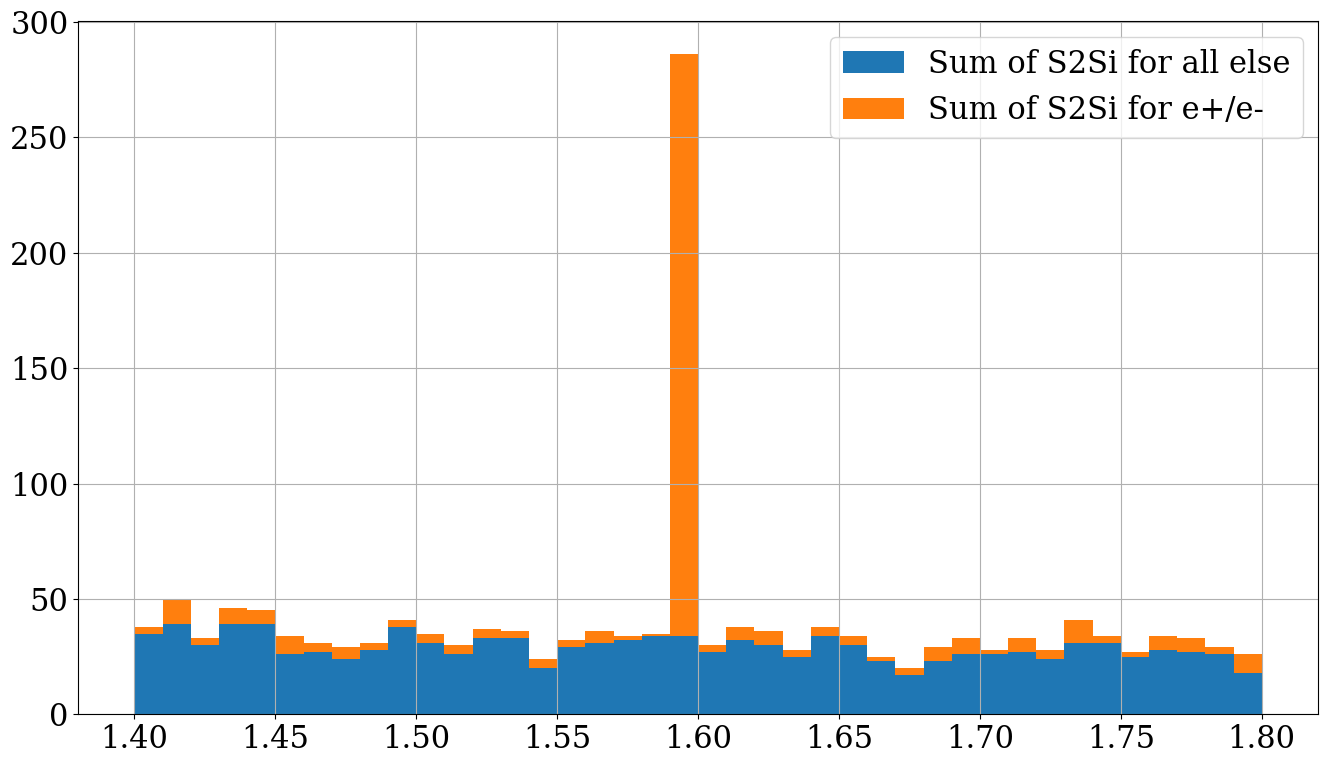

In [58]:
plt.figure(figsize=(16,9))

sig_mask = label==1
bkg_mask = label==0

print(mc_dep_e)

bins = numpy.arange(1.4,1.8, .01)
width= bins[1] - bins[0]
def histogram(data_arr, bins):
    counts, edges = numpy.histogram(data_arr, bins)

    return counts, 0.5*(edges[1:] + edges[:-1])

sig_counts, sig_x = histogram(mc_dep_e[sig_mask], bins)
bkg_counts, bkg_x = histogram(mc_dep_e[bkg_mask], bins)

plt.bar(sig_x, bkg_counts,  width=width,  label="Sum of S2Si for all else")
plt.bar(sig_x, sig_counts, bottom=bkg_counts, width=width, label="Sum of S2Si for e+/e-")

plt.legend()


plt.grid(True)
plt.show()

In [8]:
numpy.sum(label==1)

525

In [9]:
numpy.sum(label==0)

2753